<a href="https://colab.research.google.com/github/venidaydream/Intro_to_Big_Data/blob/main/Statistics_time_series_Caso3_new_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# ejecuta caso 3
print('caso 3')

caso 3


In [4]:
# importando la api de statsmodels
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
#importando matplotlib
import matplotlib.pyplot as plt

In [6]:
# Importando un DataFrame de pandas.
import pandas as pd
df=pd.read_csv('Simul.csv')
print(df[:3])

          Y        Y1        Y2        Y3         Y4        Y5        Y6  \
0  2.298704 -2.882500  6.560133 -3.342531 -18.681190  1.566716  2.839575   
1  6.371003 -2.329862  6.149235 -3.827409 -14.458870  1.232620  0.560095   
2  8.664033 -0.558244  7.563736  0.667583  -5.830734  0.902619  2.357468   

         Y7        Y8        Y9  
0  42.71518  0.472623 -3.284886  
1  43.38689  1.796142 -2.929823  
2  42.38133  1.937842 -3.015838  


# Serie Y

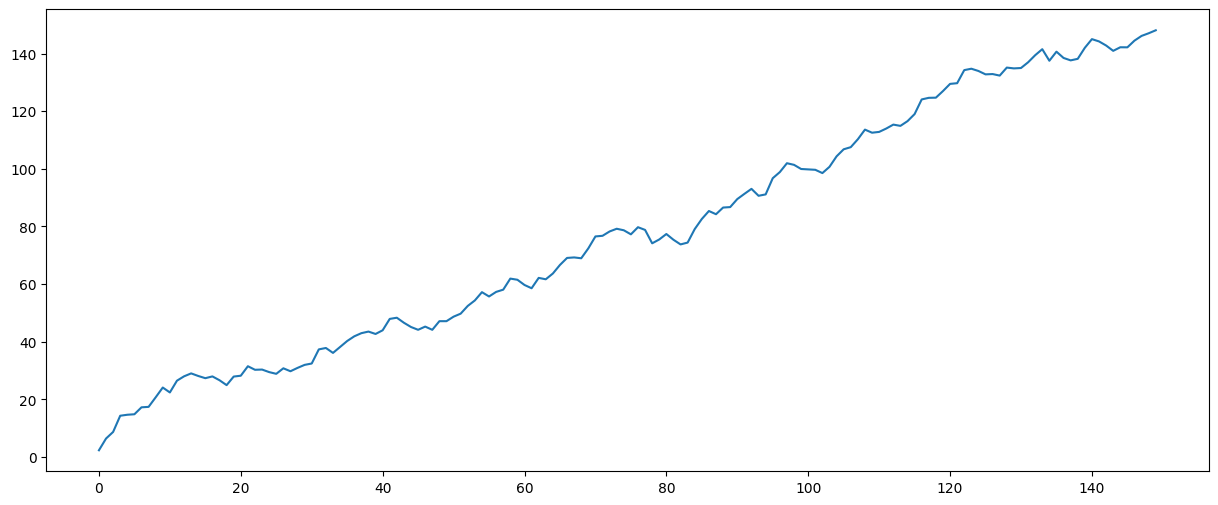

In [7]:
# utilizando la api de formula de statsmodels
plt.figure(figsize=(15,6))
plt.plot(df.Y)
plt.show()

si sale menos negativo, -3, no podemos rechazar la H0. p-value > 0,05, no es stationary.

hay algo aleatorio aqui

In [8]:
# df
from statsmodels.tsa.stattools import adfuller
from numpy import log
result=adfuller(df.Y.dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

ADF Statistic: -0.713221
p-value:0.843295


# FACT y FACP

Autocorrelation:

el primero en el grafico no existe.
decrece lento
empece cerca de 1

Partial:
1 coeficiente cerca de 1

Paseo aleatorio -> hay que diferenciar la serie

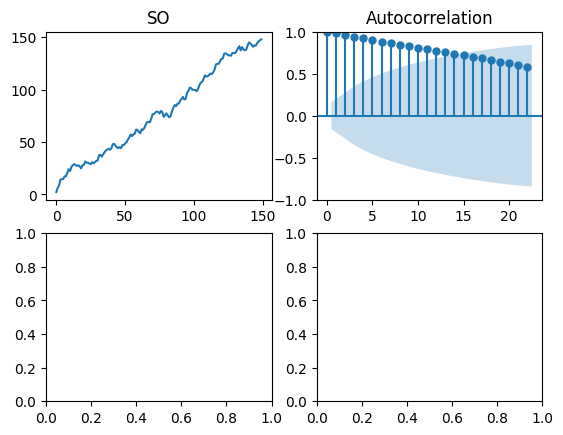

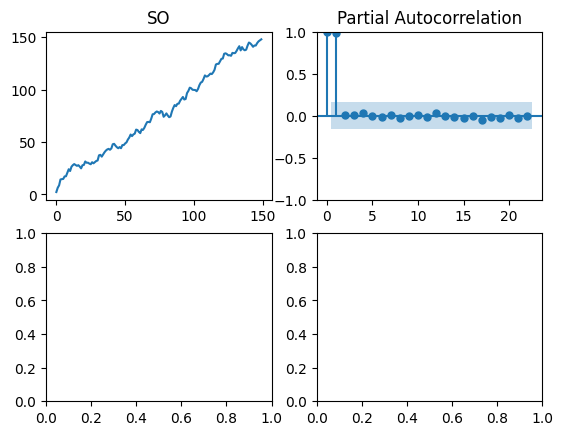

In [9]:
#acf y pcf
fig, axes=plt.subplots(2,2, sharex=False)
axes[0,0].plot(df.Y); axes[0,0].set_title('SO')
plot_acf(df.Y, ax=axes[0,1])
plt.show()
fig, axes=plt.subplots(2,2, sharex=False)
axes[0,0].plot(df.Y); axes[0,0].set_title('SO')
plot_pacf(df.Y, ax=axes[0,1])
plt.show()

# diferenciar

Y.diff()

autocorrelacion - no sale de bandas. 0. Parece a ruido blanco

parcial - no sale de bandas. 0. Parece a ruido blanco

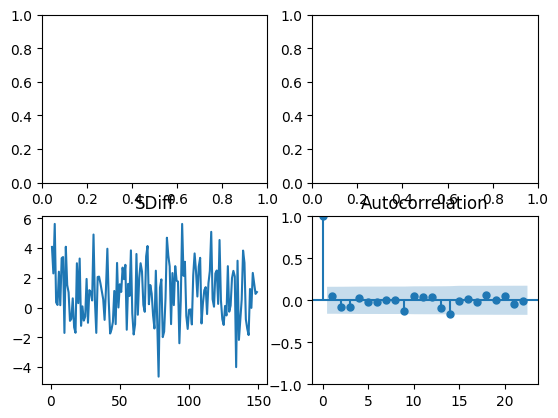

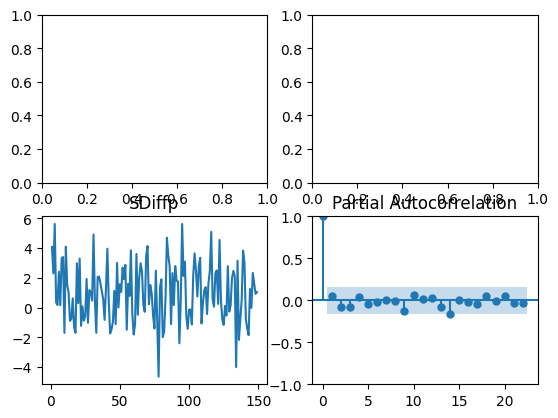

In [10]:
#acf y pcf
fig, axes=plt.subplots(2,2, sharex=False)
axes[1,0].plot(df.Y.diff()); axes[1,0].set_title('SDiff')
plot_acf(df.Y.diff().dropna(), ax=axes[1,1])
plt.show()
fig, axes=plt.subplots(2,2, sharex=False)
axes[1,0].plot(df.Y.diff()); axes[1,0].set_title('SDiffp')
plot_pacf(df.Y.diff().dropna(), ax=axes[1,1])
plt.show()

# Validacion

Serie Y es paseo alearotio = Yt = Yt-1 + Et

rechazamos que no es stationary -> es stationary

In [11]:
#nuevo df
result=adfuller(df.Y.diff().dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

ADF Statistic: -11.570800
p-value:0.000000


# Estimacion

(0, 1, 0)
regr, 1 para dif; 0 MA

Ljung-Box (L1) (Q):                   0.41

p-value Prob(Q) 0.52

In [12]:
#arima model
from statsmodels.tsa.arima.model import ARIMA
modelo_y = ARIMA(df.Y, order=(0, 1, 0))
resultados = modelo_y.fit()
print (resultados.summary())

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  150
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -326.917
Date:                Fri, 10 Nov 2023   AIC                            655.833
Time:                        19:26:20   BIC                            658.837
Sample:                             0   HQIC                           657.054
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.7128      0.579      8.140      0.000       3.578       5.848
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 0.66
Prob(Q):                              0.52   Pr

In [13]:
#ljungbox
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,5.128146,0.882455


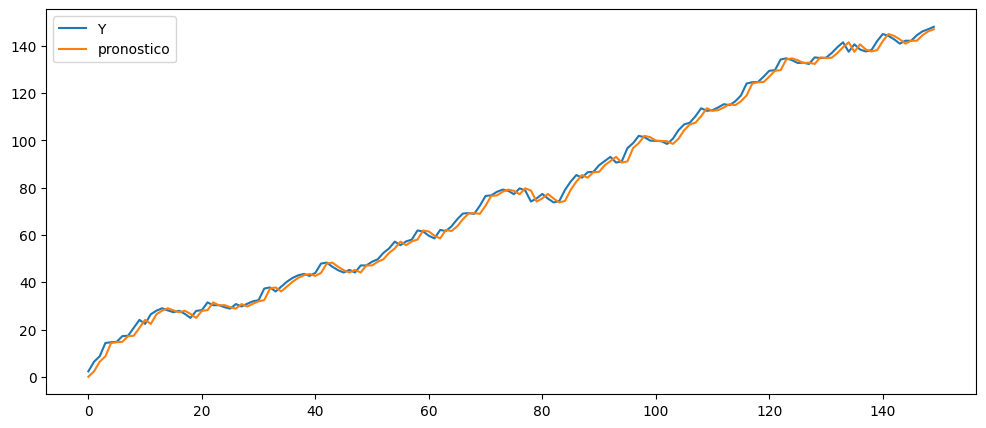

In [14]:
#predicción
df['pronostico']=resultados.fittedvalues
plot=df[['Y', 'pronostico']].plot(figsize=(12,5))
plt.show()

# Serie Y1

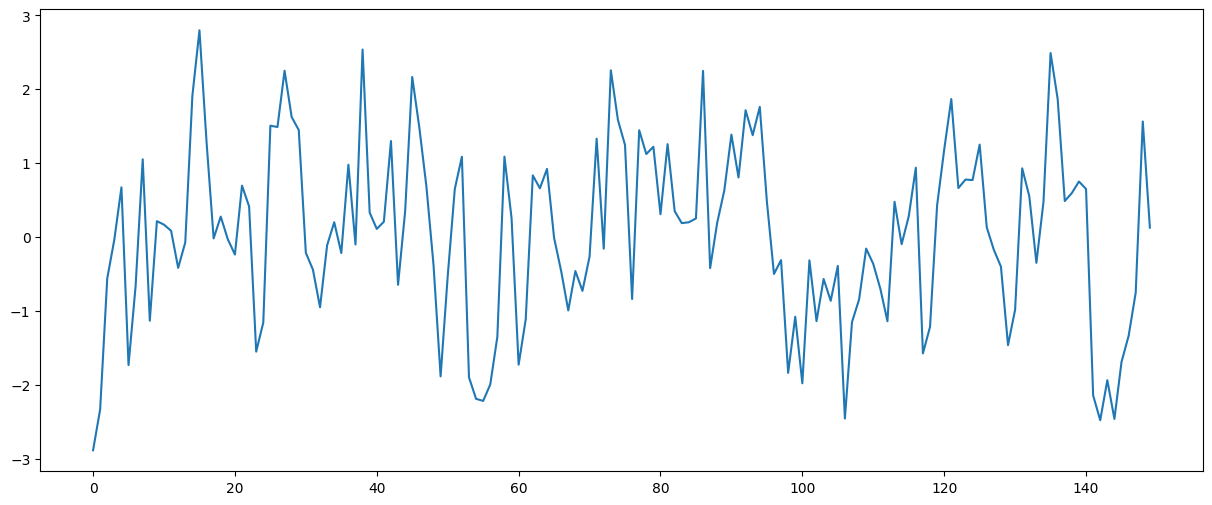

In [15]:
# utilizando la api de formula de statsmodels
plt.figure(figsize=(15,6))
plt.plot(df.Y1)
plt.show()

es stationary -> no hay que dif.

-7.104006 < -3


In [16]:
# df
from statsmodels.tsa.stattools import adfuller
from numpy import log
result=adfuller(df.Y1.dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

ADF Statistic: -7.104006
p-value:0.000000


que tipo de proceso de stationary

total - 2 signifativos

parcial - 1 significativo

autoregressivo. AR.

despues de 2 desaparece, decrece rapido. empieza a cerca de 0,5. param rho

los lejos siempre se ignoran


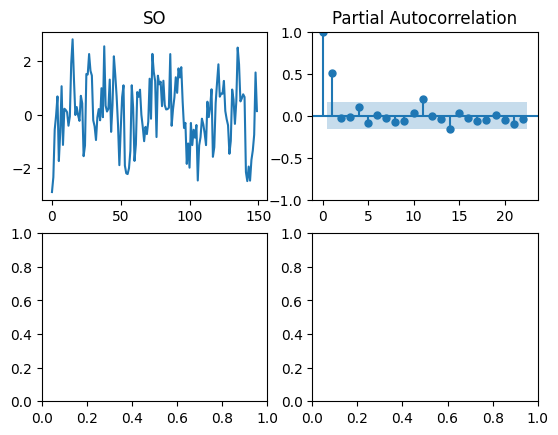

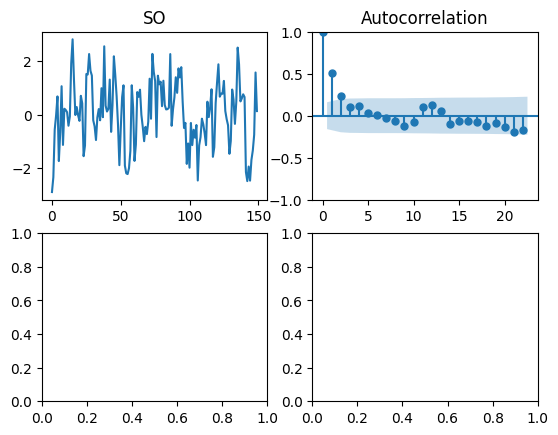

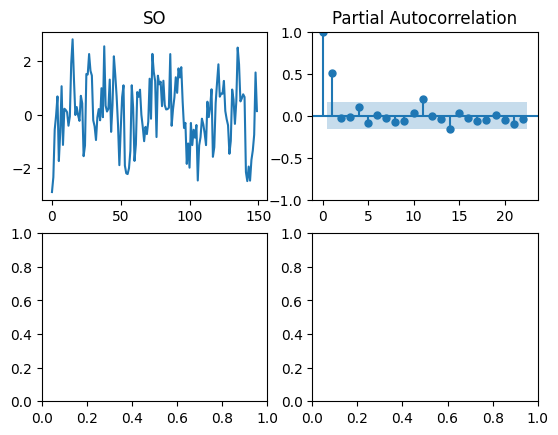

In [17]:
#acf y pcf
fig, axes=plt.subplots(2,2, sharex=False)
axes[0,0].plot(df.Y1); axes[0,0].set_title('SO')
plot_acf(df.Y1, ax=axes[0,1])
fig, axes=plt.subplots(2,2, sharex=False)
axes[0,0].plot(df.Y1); axes[0,0].set_title('SO')
plot_pacf(df.Y1, ax=axes[0,1])

estimar

(1, 0, 0)

1 - ar
0 - no hay que dif.
0 no hay MA


ar.L1          0.5266

sigma2         1.0638  variabilidad - no nos interesa

Prob(Q):                              0.96

Ljung-Box (L1) (Q):                   0.00

no puedo rechazar que sea ruido blanco

In [18]:
#arima model
from statsmodels.tsa.arima.model import ARIMA
modelo_y = ARIMA(df.Y1, order=(1, 0, 0))
resultados = modelo_y.fit()
print (resultados.summary())

                               SARIMAX Results                                
Dep. Variable:                     Y1   No. Observations:                  150
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -217.640
Date:                Fri, 10 Nov 2023   AIC                            441.280
Time:                        19:26:22   BIC                            450.312
Sample:                             0   HQIC                           444.949
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0228      0.171      0.133      0.894      -0.313       0.358
ar.L1          0.5266      0.080      6.589      0.000       0.370       0.683
sigma2         1.0638      0.122      8.715      0.0

tb aqui es ruido blanco

Yt1 = 0,5Yt-1 + Et

In [19]:
#ljungbox
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,7.200881,0.706354


muy parecida - hay volatilidad mas pequeña, porque en el original hay factores aleatorias

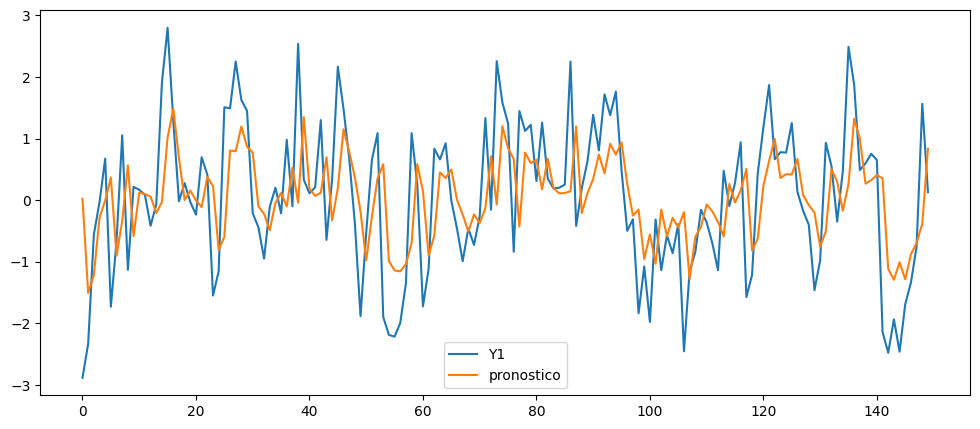

In [20]:
#predicción
df['pronostico']=resultados.fittedvalues
plot=df[['Y1', 'pronostico']].plot(figsize=(12,5))
plt.show()

# Serie Y2

no es stationary

In [21]:
# df
from statsmodels.tsa.stattools import adfuller
from numpy import log
result=adfuller(df.Y2.dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

ADF Statistic: -1.150434
p-value:0.694546



total - decrece muy lento cerca de 1

parcial -



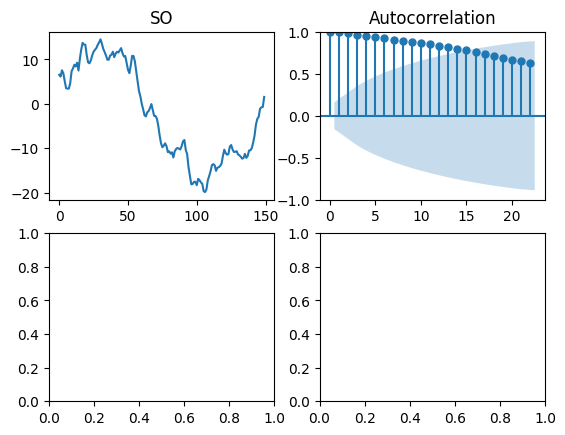

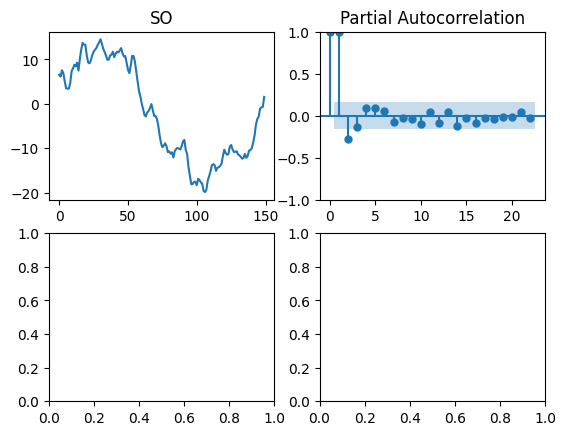

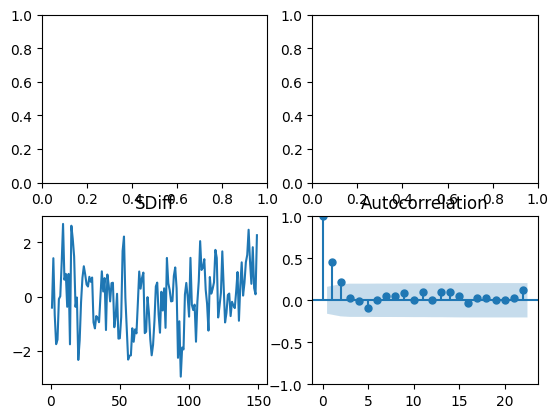

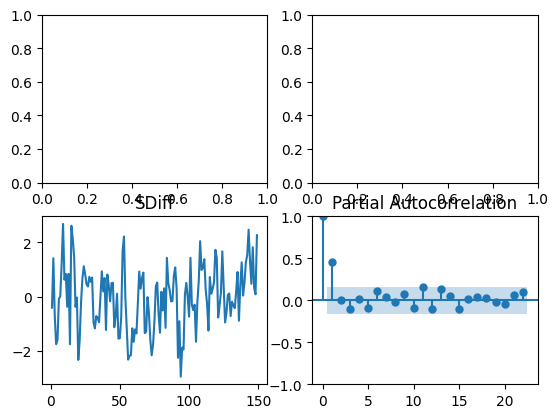

In [22]:
#acf y pcf
fig, axes=plt.subplots(2,2, sharex=False)
axes[0,0].plot(df.Y2); axes[0,0].set_title('SO')
plot_acf(df.Y2, ax=axes[0,1])
plt.show()
fig, axes=plt.subplots(2,2, sharex=False)
axes[0,0].plot(df.Y2); axes[0,0].set_title('SO')
plot_pacf(df.Y2, ax=axes[0,1])
plt.show()
fig, axes=plt.subplots(2,2, sharex=False)
axes[1,0].plot(df.Y2.diff()); axes[1,0].set_title('SDiff')
plot_acf(df.Y2.diff().dropna(), ax=axes[1,1])
plt.show()
fig, axes=plt.subplots(2,2, sharex=False)
axes[1,0].plot(df.Y2.diff()); axes[1,0].set_title('SDiff')
plot_pacf(df.Y2.diff().dropna(), ax=axes[1,1])
plt.show()

In [23]:
#nuevo df
result=adfuller(df.Y2.diff().dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

ADF Statistic: -7.101717
p-value:0.000000


is stationary

AR - paseo aleatorio y AR - mescla

(1, 0, 0)  -> he did it on purpose

(1, 1, 0) -> correct

ar.L1          0.4707

Y2t = Y2t-1 + 0,47*Y2t-1 + Et

Y2t = 1,47*Y2t-1 + Et



In [30]:
#arima model
from statsmodels.tsa.arima.model import ARIMA
#modelo_y = ARIMA(df.Y2, order=(1, 0, 0))  -> he did it on purpose
modelo_y = ARIMA(df.Y2, order=(1, 1, 0))
resultados = modelo_y.fit()
print (resultados.summary())

                               SARIMAX Results                                
Dep. Variable:                     Y2   No. Observations:                  150
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -213.489
Date:                Fri, 10 Nov 2023   AIC                            430.978
Time:                        19:27:56   BIC                            436.986
Sample:                             0   HQIC                           433.419
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4707      0.079      5.987      0.000       0.317       0.625
sigma2         1.0264      0.115      8.914      0.000       0.801       1.252
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [25]:
#ljungbox
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,39.616188,0.00002


In [29]:
#arima model
from statsmodels.tsa.arima.model import ARIMA
#modelo_y = ARIMA(df.Y2, order=(1, 0, 0))  -> he did it on purpose
modelo_y = ARIMA(df.Y2, order=(1, 1, 0))
resultados = modelo_y.fit()
print (resultados.summary())

                               SARIMAX Results                                
Dep. Variable:                     Y2   No. Observations:                  150
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -213.489
Date:                Fri, 10 Nov 2023   AIC                            430.978
Time:                        19:27:06   BIC                            436.986
Sample:                             0   HQIC                           433.419
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4707      0.079      5.987      0.000       0.317       0.625
sigma2         1.0264      0.115      8.914      0.000       0.801       1.252
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [27]:
#ljungbox
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,12.577929,0.248237


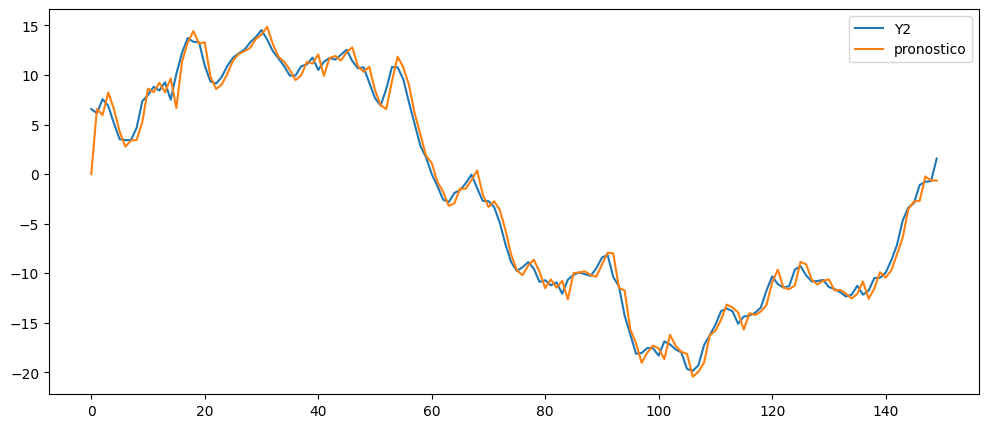

In [28]:
#predicción
df['pronostico']=resultados.fittedvalues
plot=df[['Y2', 'pronostico']].plot(figsize=(12,5))
plt.show()